# SVM for Classification
Necessary imports and plot functions used over the entire python notebook:

In [1]:
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
IMAGES_PATH = "./images"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Retrieval

In [2]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }

In [3]:
X, y = mnist["data"]/255.0, mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## SVM on raw data (784 features)

In [4]:
from sklearn.svm import SVC
C = [0.01, 0.1, 1, 10]
# The indices which have the value -1 will be kept in train.
train_indices = np.full((60000,), -1, dtype=int)

# The indices which have zero or positive values, will be kept in test
test_indices = np.full((10000,), 0, dtype=int)
test_fold = np.append(train_indices, test_indices)

from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold)

# Check how many splits will be done, based on test_fold
ps.get_n_splits()

1

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},]

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=ps, n_jobs=-1, return_train_score=True)
grid_search.fit(np.concatenate((X_train, X_test)), y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [7]:
print("Best score: ", str(grid_search.best_score_), " for SVC with params:")
print(grid_search.best_estimator_)

Best score:  0.9472  for SVC with params:
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [8]:
print(grid_search.cv_results_['params'])
print("Train score:", str(grid_search.cv_results_['mean_train_score']))
print("Test score:", str(grid_search.cv_results_['mean_test_score']))

[{'C': 0.01, 'kernel': 'linear'}, {'C': 0.1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}]
Train score: [0.94513333 0.9588     0.97075    0.97966667]
Test score: [0.9443 0.9472 0.9404 0.931 ]


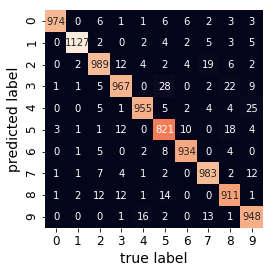

Text(88.68,0.5,'predicted label')

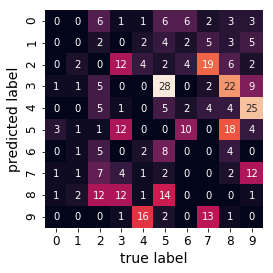

In [10]:
ytilde = grid_search.predict(X_test)
mat = confusion_matrix(y_test, ytilde)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
       xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
np.fill_diagonal(mat, 0)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## SVM with PCA (40)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(40)
Xtrain_pc40 = pca.fit_transform(X_train)
Xtest_pc40 = pca.transform(X_test)

In [ ]:
df = pd.DataFrame()

In [5]:
from sklearn.svm import SVC
C = [0.01, 0.1, 1, 10]
# The indices which have the value -1 will be kept in train.
train_indices = np.full((60000,), -1, dtype=int)

# The indices which have zero or positive values, will be kept in test
test_indices = np.full((10000,), 0, dtype=int)
test_fold = np.append(train_indices, test_indices)

from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold)

# Check how many splits will be done, based on test_fold
ps.get_n_splits()

1

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},]

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=ps, n_jobs=-1, return_train_score=True)
grid_search.fit(np.concatenate((Xtrain_pc40, Xtest_pc40)), y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
print("Best score: ", str(grid_search.best_score_), " for SVC with params:")
print(grid_search.best_estimator_)

Best score:  0.9337  for SVC with params:
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [18]:
print(grid_search.cv_results_['params'])
print("Train score:", str(grid_search.cv_results_['mean_train_score']))
print("Test score:", str(grid_search.cv_results_['mean_test_score']))

[{'C': 0.01, 'kernel': 'linear'}, {'C': 0.1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}]
Train score: [0.92741667 0.93056667 0.9312     0.9313    ]
Test score: [0.9332 0.9337 0.9337 0.9336]


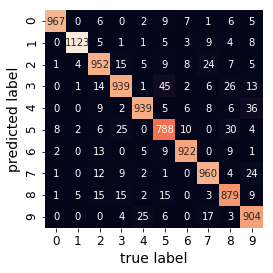

Text(88.68, 0.5, 'predicted label')

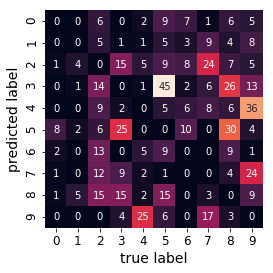

In [19]:
ytilde = grid_search.predict(Xtest_pc40)
mat = confusion_matrix(y_test, ytilde)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
       xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
np.fill_diagonal(mat, 0)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## SVM with PCA (80)

In [20]:
pca = PCA(80)
Xtrain_pc80 = pca.fit_transform(X_train)
Xtest_pc80 = pca.transform(X_test)

In [21]:
C = [0.01, 0.1, 1, 10]
# The indices which have the value -1 will be kept in train.
train_indices = np.full((60000,), -1, dtype=int)

# The indices which have zero or positive values, will be kept in test
test_indices = np.full((10000,), 0, dtype=int)
test_fold = np.append(train_indices, test_indices)

from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold)

# Check how many splits will be done, based on test_fold
ps.get_n_splits()

1

In [22]:
param_grid = [{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},]

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=ps, n_jobs=-1, return_train_score=True)
grid_search.fit(np.concatenate((Xtrain_pc80, Xtest_pc80)), y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
print("Best score: ", str(grid_search.best_score_), " for SVC with params:")
print(grid_search.best_estimator_)

Best score:  0.9435  for SVC with params:
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [24]:
print(grid_search.cv_results_['params'])
print("Train score:", str(grid_search.cv_results_['mean_train_score']))
print("Test score:", str(grid_search.cv_results_['mean_test_score']))

[{'C': 0.01, 'kernel': 'linear'}, {'C': 0.1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}]
Train score: [0.93838333 0.94458333 0.94698333 0.94736667]
Test score: [0.941  0.9435 0.9429 0.9425]


/home/zcy/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


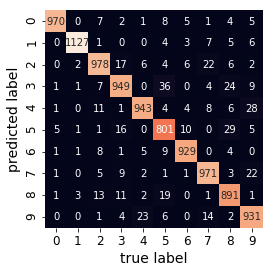

Text(88.68, 0.5, 'predicted label')

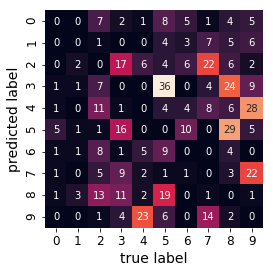

In [25]:
ytilde = grid_search.predict(Xtest_pc80)
mat = confusion_matrix(y_test, ytilde)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
       xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
np.fill_diagonal(mat, 0)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## SVM with PCA (200)

In [26]:
pca = PCA(200)
Xtrain_pc200 = pca.fit_transform(X_train)
Xtest_pc200 = pca.transform(X_test)

In [27]:
C = [0.01, 0.1, 1, 10]
# The indices which have the value -1 will be kept in train.
train_indices = np.full((60000,), -1, dtype=int)

# The indices which have zero or positive values, will be kept in test
test_indices = np.full((10000,), 0, dtype=int)
test_fold = np.append(train_indices, test_indices)

from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold)

# Check how many splits will be done, based on test_fold
ps.get_n_splits()

1

In [28]:
param_grid = [{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},]

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=ps, n_jobs=-1, return_train_score=True)
grid_search.fit(np.concatenate((Xtrain_pc200, Xtest_pc200)), y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
print("Best score: ", str(grid_search.best_score_), " for SVC with params:")
print(grid_search.best_estimator_)

Best score:  0.9462  for SVC with params:
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [30]:
print(grid_search.cv_results_['params'])
print("Train score:", str(grid_search.cv_results_['mean_train_score']))
print("Test score:", str(grid_search.cv_results_['mean_test_score']))

[{'C': 0.01, 'kernel': 'linear'}, {'C': 0.1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}]
Train score: [0.94365    0.95366667 0.9589     0.96225   ]
Test score: [0.9433 0.9462 0.9446 0.9405]


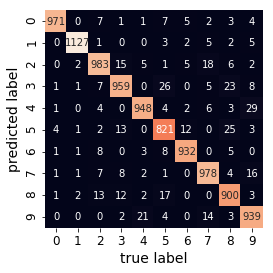

Text(88.68, 0.5, 'predicted label')

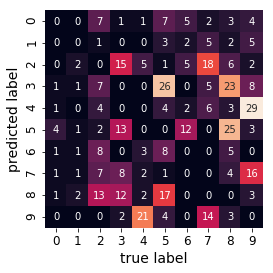

In [31]:
ytilde = grid_search.predict(Xtest_pc200)
mat = confusion_matrix(y_test, ytilde)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
       xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
np.fill_diagonal(mat, 0)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')

| Num. PC | C | Train Accuracy | Test Accuracy |
| --- | --- | --- | --- |
| 40 | 0.01 | **0.9274** | **0.9332** |
|  | 0.1 | 0.9306 | 0.9337 |
|  | 1 | 0.9312 | 0.9337 |
|  | 10 | 0.9313 | 0.9336 |
| 80 | 0.01 | 0.9384 | 0.941 |
|  | 0.1 | 0.9446 | 0.9435 |
|  | 1 | 0.9470 | 0.9429 |
|  | 10 | 0.9474 | 0.9425 |
| 200 | 0.01 | 0.9437 | 0.9433 |
|  | 0.1 | 0.9537 | **0.9462** |
|  | 1 | 0.9589 | 0.9446 |
|  | 10 | **0.9623** | 0.9405 |
| 784 | 0.01 | 0.9437 | 0.9433 |
|  | 0.1 | 0.9537 | **0.9462** |
|  | 1 | 0.9589 | 0.9446 |
|  | 10 | **0.9623** | 0.9405 |

## SVC with radial basis function

In [52]:
param_grid = [{'kernel': ['rbf'], 'gamma': [0.03, 0.05, 0.07],
                     'C': [43, 45, 47]}]
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=ps, n_jobs=-1, return_train_score=True)
grid_search.fit(np.concatenate((Xtrain_pc40, Xtest_pc40)), y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [43, 45, 47], 'kernel': ['rbf'], 'gamma': [0.03, 0.05, 0.07]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [53]:
print("Best score: ", str(grid_search.best_score_), " for SVC with params:")
print(grid_search.best_estimator_)

Best score:  0.9854  for SVC with params:
SVC(C=43, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [54]:
print(grid_search.cv_results_['params'])
print("Train score:", str(grid_search.cv_results_['mean_train_score']))
print("Test score:", str(grid_search.cv_results_['mean_test_score']))

[{'C': 43, 'kernel': 'rbf', 'gamma': 0.03}, {'C': 43, 'kernel': 'rbf', 'gamma': 0.05}, {'C': 43, 'kernel': 'rbf', 'gamma': 0.07}, {'C': 45, 'kernel': 'rbf', 'gamma': 0.03}, {'C': 45, 'kernel': 'rbf', 'gamma': 0.05}, {'C': 45, 'kernel': 'rbf', 'gamma': 0.07}, {'C': 47, 'kernel': 'rbf', 'gamma': 0.03}, {'C': 47, 'kernel': 'rbf', 'gamma': 0.05}, {'C': 47, 'kernel': 'rbf', 'gamma': 0.07}]
Train score: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test score: [0.9848 0.9853 0.9854 0.9848 0.9853 0.9854 0.9848 0.9853 0.9854]


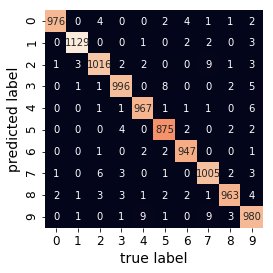

Text(88.68, 0.5, 'predicted label')

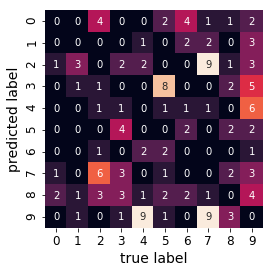

In [55]:
svc = SVC(C=43, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svc.fit(Xtrain_pc40, y_train)
ytilde = svc.predict(Xtest_pc40)
mat = confusion_matrix(y_test, ytilde)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
       xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
np.fill_diagonal(mat, 0)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel('true label')
plt.ylabel('predicted label')